___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Введение в алгоритм DBSCAN


Давайте визуально посмотрим на разницу между DBSCAN и другими алгоритмами кластеризации, такими как K-Means Clustering.

При желании можете также посмотреть следующий инструмент визуализации:
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ (это не наш веб-сайт, это просто хороший ресурс в интернете).

## DBSCAN и примеры кластеризации данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

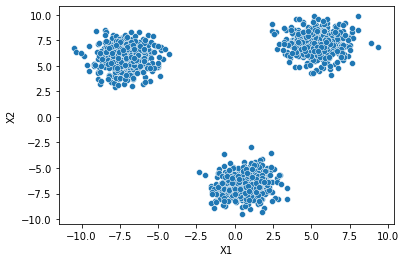

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

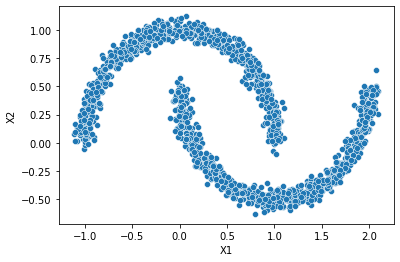

In [23]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [8]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

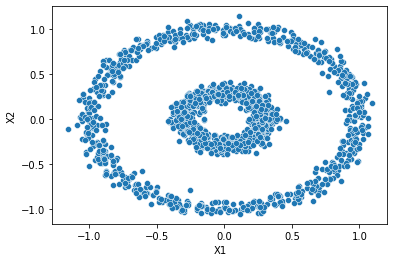

In [10]:
sns.scatterplot(data=circles,x='X1',y='X2')

## "Создаём" целевую переменную с помощью кластеризации (Label Discovery)

In [11]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## Результаты Kmeans

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

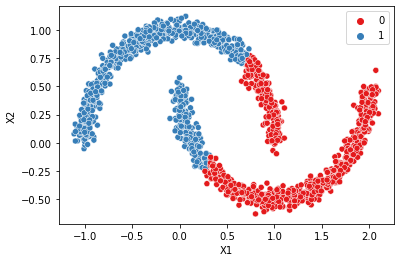

In [27]:
display_categories(model,moons)

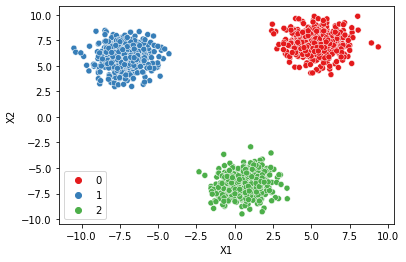

In [14]:
model = KMeans(n_clusters = 3)
display_categories(model,blobs)

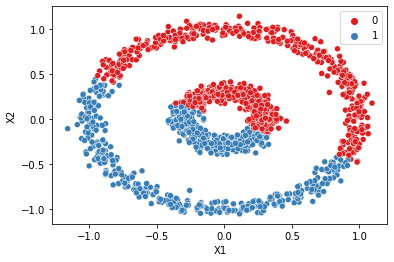

In [25]:
model = KMeans(n_clusters = 2)
display_categories(model,circles)

## Результаты DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
model = DBSCAN(eps=0.6)

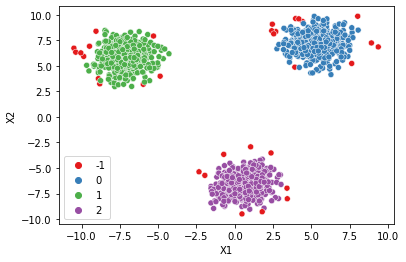

In [18]:
display_categories(model,blobs)

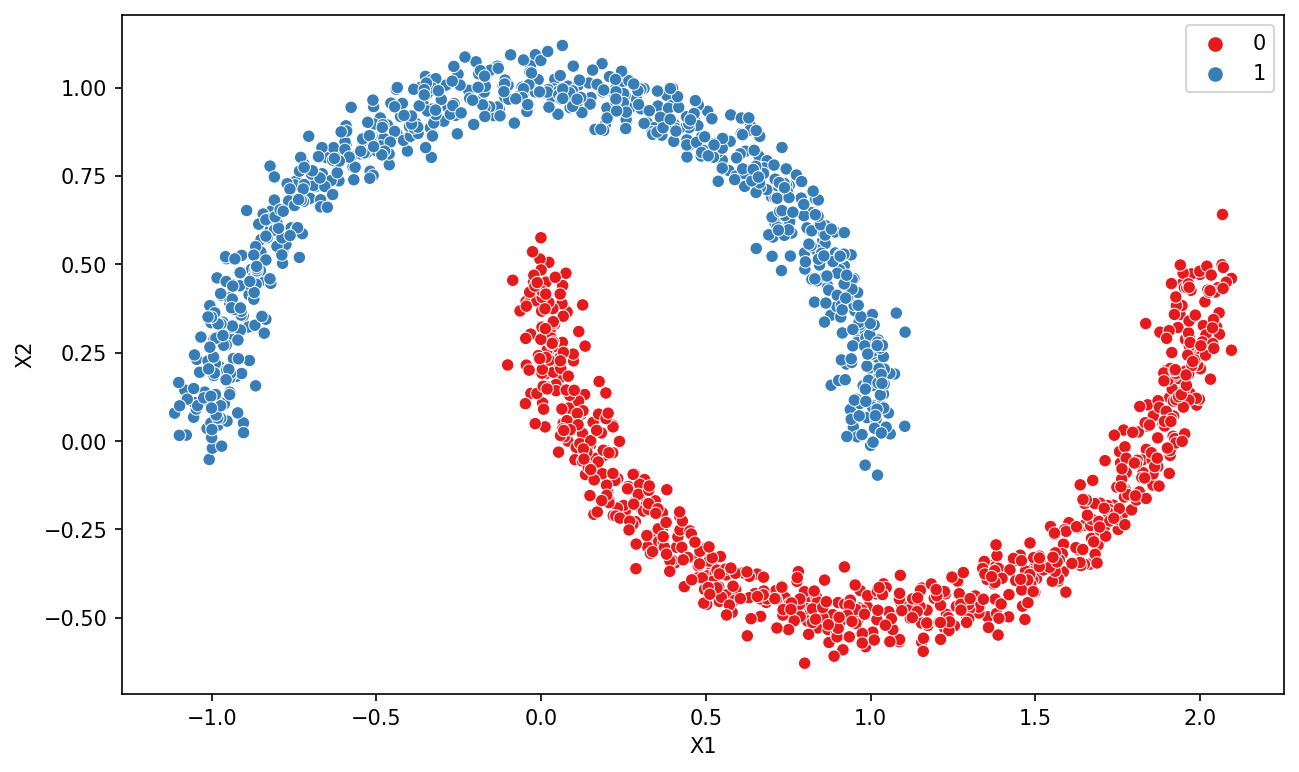

In [28]:
model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,moons)

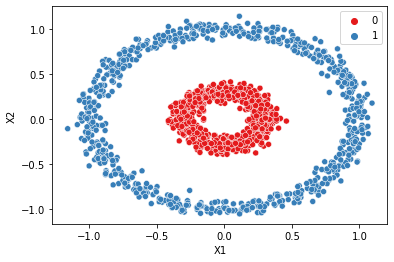

In [20]:
display_categories(model,circles)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

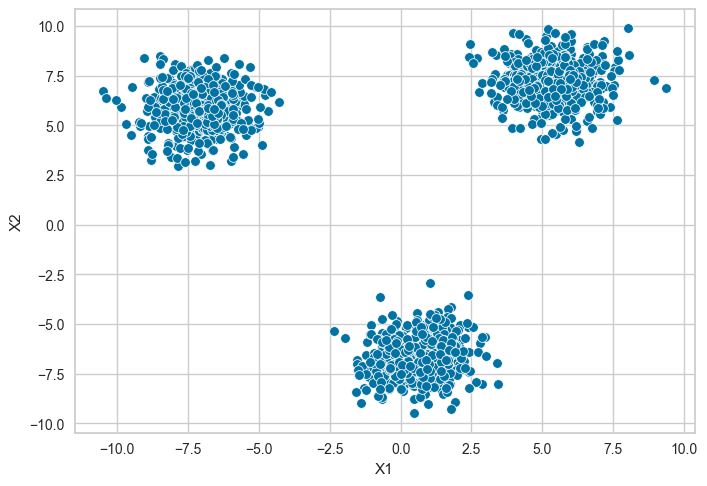

In [5]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [6]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [7]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

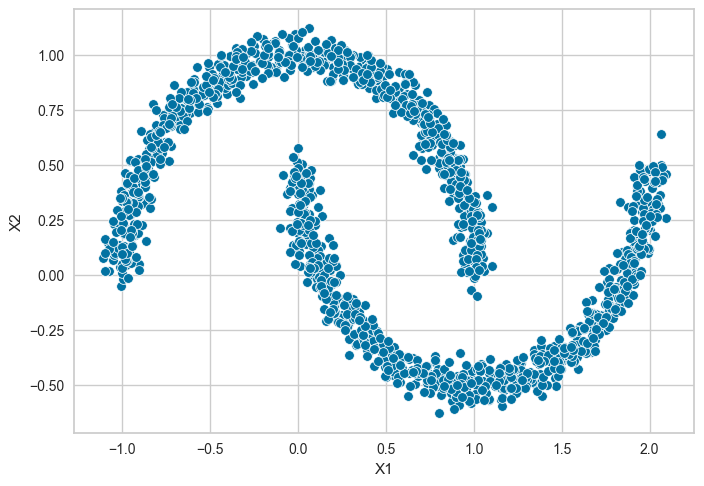

In [8]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [9]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [10]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

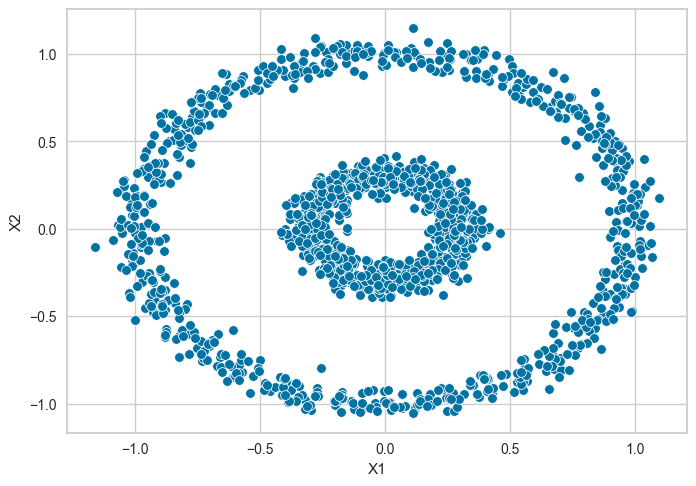

In [11]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [12]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [13]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(3)

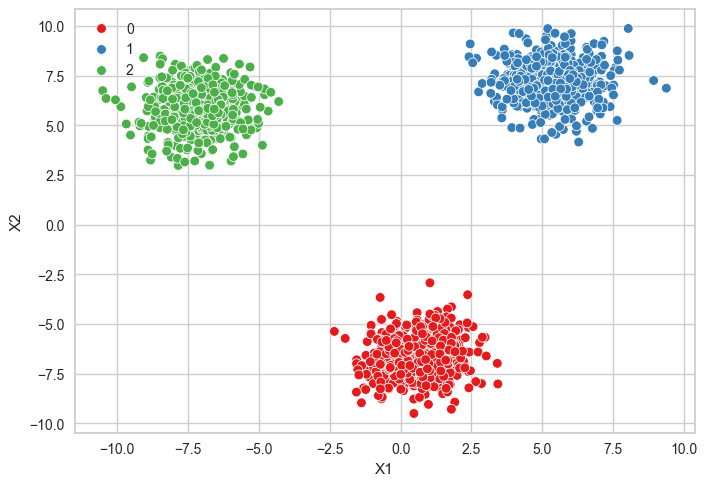

In [19]:
display_categories(model, blobs)

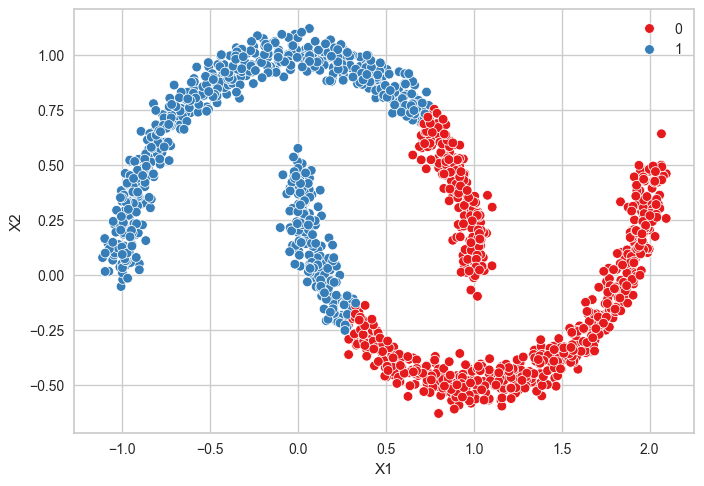

In [20]:
model = KMeans(n_clusters=2)
display_categories(model, moons)

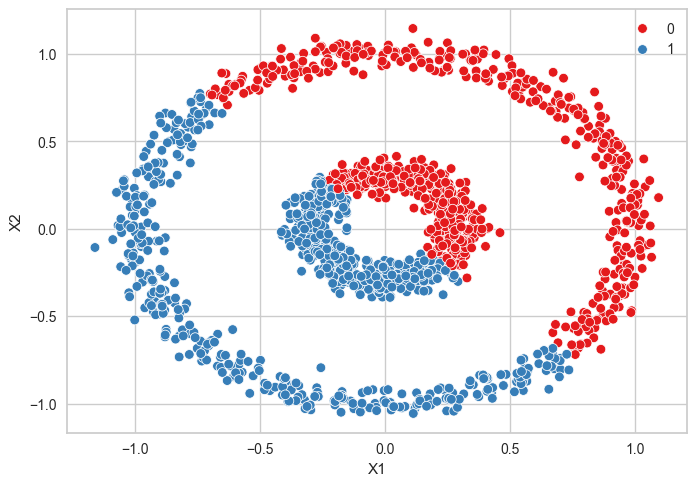

In [28]:
model = KMeans(n_clusters=2)
display_categories(model, circles)

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

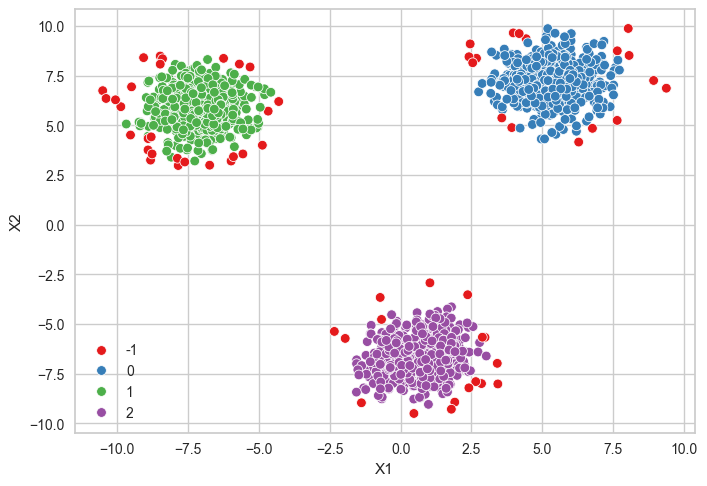

In [32]:
model = DBSCAN()
display_categories(model, blobs)

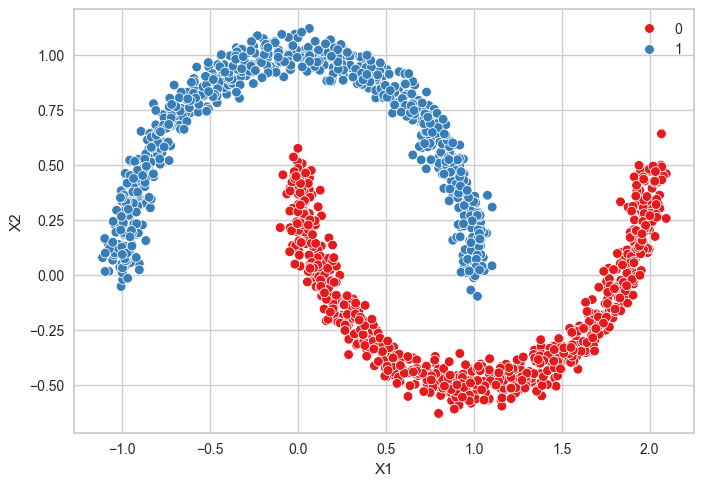

In [33]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

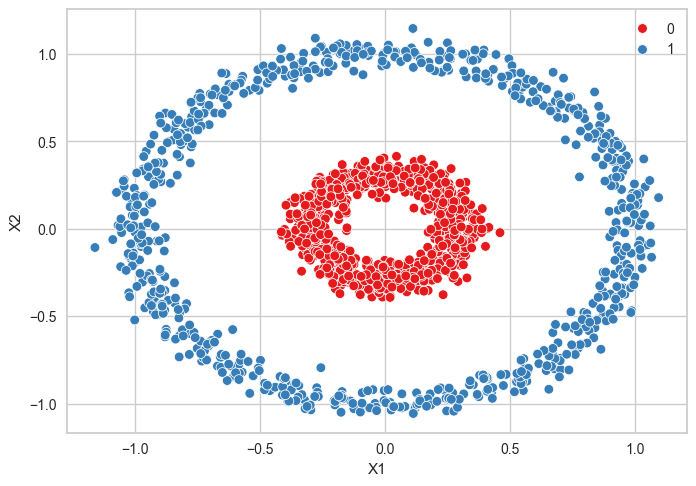

In [34]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)